In [231]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Import and preprocess data from csv

In [232]:
raw_df = pd.read_csv("metadata.csv")
raw_df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [233]:
COI = ["diagnostic", "age", "itch", "grew", "hurt", "changed", "bleed", "elevation", "biopsed"]
COI2 = ["diagnostic", "age", "itch", "grew", "hurt", "changed", "bleed", "elevation", "biopsed", "fitspatrick"]
df = raw_df.loc[:,COI]
df2 = raw_df.loc[:,COI2]
df = df.dropna()
df2 = df2.dropna()



In [234]:
COIbool = ["itch", "grew", "hurt", "changed", "bleed", "elevation", "biopsed"]
d = {"False": 0, "True": 1, False: 0, True:1, "UNK": None}
for col in COIbool:
    df2[col] = df2[col].replace(d)
    df[col] = df[col].replace(d)
df = df.dropna()
df2 = df2.dropna()
df2

,diagnostic,age,itch,grew,hurt,changed,bleed,elevation,biopsed,fitspatrick
1,BCC,55,1.0,1.0,0.0,1.0,1.0,1.0,1,3.0
4,BCC,79,1.0,1.0,0.0,0.0,1.0,1.0,1,1.0
6,BCC,52,0.0,1.0,0.0,1.0,1.0,1.0,1,3.0
7,BCC,74,1.0,1.0,1.0,0.0,1.0,1.0,1,1.0
9,ACK,58,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
2286,ACK,20,0.0,0.0,0.0,0.0,0.0,1.0,1,4.0
2287,MEL,75,0.0,1.0,0.0,0.0,0.0,0.0,1,2.0
2289,ACK,66,1.0,0.0,1.0,0.0,1.0,1.0,1,2.0
2294,BCC,55,1.0,1.0,0.0,1.0,0.0,0.0,1,3.0


In [235]:
y = df["diagnostic"]
X = df.drop("diagnostic",axis=1)

In [236]:
cancers = {"BCC":1, "MEL":1, "SCC": 1, "ACK": 0, "NEV":0, "SEK":0}
y = y.replace(cancers)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, train_size=0.75)

In [238]:
X_test


,age,itch,grew,hurt,changed,bleed,elevation,biopsed
3,75,1.0,0.0,0.0,0.0,0.0,0.0,0
1745,79,1.0,0.0,0.0,0.0,0.0,1.0,0
1194,12,0.0,0.0,0.0,0.0,0.0,0.0,0
703,53,1.0,1.0,1.0,0.0,1.0,1.0,1
1759,81,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
1034,39,1.0,1.0,1.0,0.0,1.0,1.0,1
1598,39,1.0,1.0,1.0,1.0,1.0,1.0,1
1616,62,1.0,0.0,0.0,0.0,0.0,0.0,0
717,50,0.0,0.0,0.0,0.0,0.0,0.0,0


In [239]:
from sklearn.metrics import accuracy_score, roc_auc_score

n_vals = [i for i in range(3,51)]
knn_classifiers = []

for i in n_vals:
    knnc = KNeighborsClassifier(n_neighbors=i)
    knnc.fit(X_train, y_train)
    knn_classifiers.append(knnc)

predicted_ys = [model.predict(X_test) for model in knn_classifiers]
accuracy_scores = [accuracy_score(y_test, y_pred) for y_pred in predicted_ys]
roc_auc_scores = [roc_auc_score(y_test,y_pred) for y_pred in predicted_ys]

for i, val in enumerate(n_vals):
    print(f"N = {val} \t Accuracy scores = {round(accuracy_scores[i], 4)} \t ROC AUC Scores = {round(roc_auc_scores[i],4)}")


N = 3 	 Accuracy scores = 0.8882 	 ROC AUC Scores = 0.882
N = 4 	 Accuracy scores = 0.8776 	 ROC AUC Scores = 0.8631
N = 5 	 Accuracy scores = 0.8755 	 ROC AUC Scores = 0.8754
N = 6 	 Accuracy scores = 0.8713 	 ROC AUC Scores = 0.8581
N = 7 	 Accuracy scores = 0.884 	 ROC AUC Scores = 0.8798
N = 8 	 Accuracy scores = 0.8797 	 ROC AUC Scores = 0.8706
N = 9 	 Accuracy scores = 0.8797 	 ROC AUC Scores = 0.8788
N = 10 	 Accuracy scores = 0.8819 	 ROC AUC Scores = 0.8758
N = 11 	 Accuracy scores = 0.8734 	 ROC AUC Scores = 0.8703
N = 12 	 Accuracy scores = 0.8692 	 ROC AUC Scores = 0.8564
N = 13 	 Accuracy scores = 0.865 	 ROC AUC Scores = 0.8577
N = 14 	 Accuracy scores = 0.8629 	 ROC AUC Scores = 0.8491
N = 15 	 Accuracy scores = 0.8692 	 ROC AUC Scores = 0.8611
N = 16 	 Accuracy scores = 0.8608 	 ROC AUC Scores = 0.8486
N = 17 	 Accuracy scores = 0.8608 	 ROC AUC Scores = 0.8509
N = 18 	 Accuracy scores = 0.8565 	 ROC AUC Scores = 0.8429
N = 19 	 Accuracy scores = 0.8502 	 ROC AUC Scores

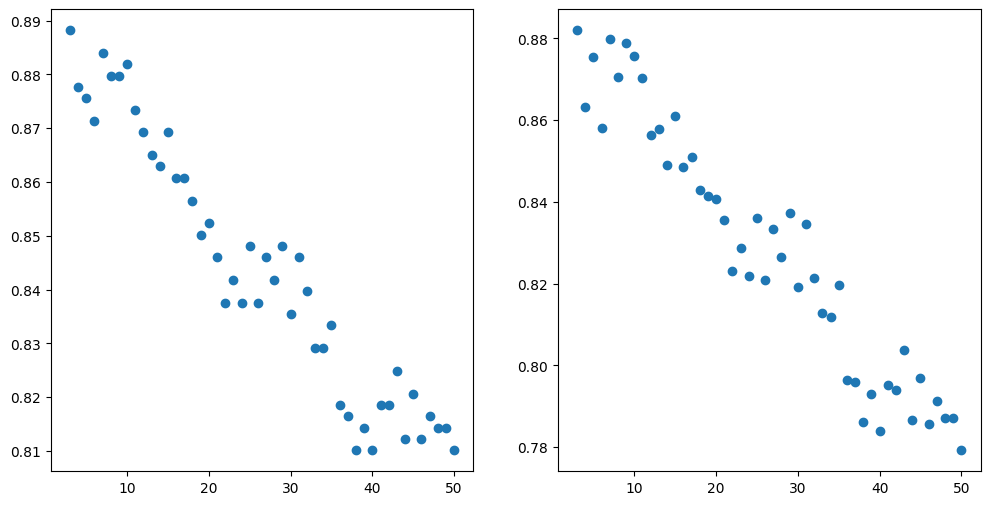

In [240]:
fig, ax = plt.subplots(ncols = 2, figsize=(12,6))
ax[0].scatter(n_vals,accuracy_scores)

ax[1].scatter(n_vals, roc_auc_scores)


In [241]:
y_pred2 = knn_classifiers[2].predict(X_test)





In [242]:
X_test

,age,itch,grew,hurt,changed,bleed,elevation,biopsed
3,75,1.0,0.0,0.0,0.0,0.0,0.0,0
1745,79,1.0,0.0,0.0,0.0,0.0,1.0,0
1194,12,0.0,0.0,0.0,0.0,0.0,0.0,0
703,53,1.0,1.0,1.0,0.0,1.0,1.0,1
1759,81,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
1034,39,1.0,1.0,1.0,0.0,1.0,1.0,1
1598,39,1.0,1.0,1.0,1.0,1.0,1.0,1
1616,62,1.0,0.0,0.0,0.0,0.0,0.0,0
717,50,0.0,0.0,0.0,0.0,0.0,0.0,0


In [243]:
X_test_fits = pd.concat([df2["fitspatrick"], X_test], axis = 1).dropna()

In [244]:
accu = []

for i in range(5):
    x2 = X_test_fits.loc[X_test_fits["fitspatrick"] == i+1]
    y_pred2 = knn_classifiers[2].predict(x2.drop("fitspatrick", axis = 1))
    
    idx = x2.index
    print(len(idx))
    l = [y_test.loc[id] for id in idx]
    accu.append(accuracy_score(l, y_pred2))


27
155
70
14
2


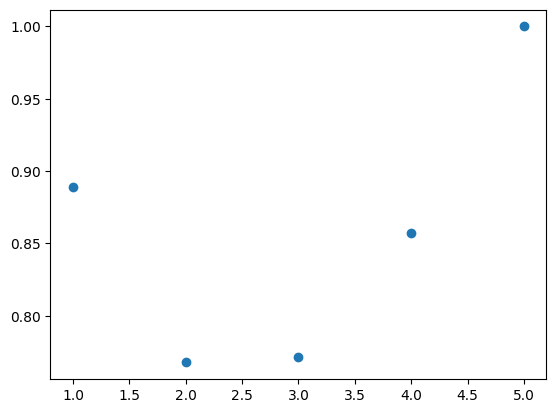

In [245]:
plt.scatter([1,2,3,4,5], accu)